In [1]:
import pandas as pd

In [2]:
%pwd

'/content'

In [14]:
%ls

sample/  sample_data/  sample.txt


In [4]:
%mkdir sample

In [5]:
%ls

sample/  sample_data/


In [6]:
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [7]:
%%time
for _ in range(10000):
  continue

CPU times: user 597 µs, sys: 0 ns, total: 597 µs
Wall time: 556 µs


In [8]:
!python --version

Python 3.7.15


In [9]:
%%writefile sample.txt
아무거나 작성해

Writing sample.txt


In [10]:
%ls

sample/  sample_data/  sample.txt


In [11]:
!type sample.txt

/bin/bash: line 0: type: sample.txt: not found


In [12]:
with open('sample.txt','r',encoding='utf8') as f:
  print(f.read())

아무거나 작성해



csv 는 ,로 데이터가 구분되어 있으며 판다스를 이용해서 자동적으로 읽어들일수있음

In [16]:
%%writefile smaple1.csv
c1, c2, c3
1,1.11, one
2,2.22, two
3,3.33, three


Writing smaple1.csv


In [28]:
contents = '''c1, c2, c3
1,1.11, one
2,2.22, two
3,3.33, three'''
with open('sample1.csv','w',encoding='utf=8') as f:
  f.write(contents)


In [29]:
pd.read_csv('sample1.csv')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [30]:
pd.read_csv('sample1.csv', index_col='c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [31]:
df1 = pd.read_csv('sample1.csv')

In [32]:
df1.set_index('c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


In [33]:
%%writefile sample1_2.txt
c1/c2/c3
1/1.11/one
2/2.22/two
3/3.33/three


Overwriting sample1_2.txt


In [34]:
pd.read_csv('sample1_2.txt', sep='/')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [35]:
pd.read_csv('sample1.csv', names=['d1','d2','d3'])

,d1,d2,d3
0,c1,c2,c3
1,1,1.11,one
2,2,2.22,two
3,3,3.33,three


In [36]:
pd.read_csv('sample1.csv', names=['d1','d2','d3'], skiprows=[0])

,d1,d2,d3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [37]:
pd.read_csv('sample1.csv', names=['d1','d2','d3'], skiprows=[0,2])

,d1,d2,d3
0,1,1.11,one
1,3,3.33,three


In [38]:
%%writefile sample1_4.csv
c1,c2,c3
1, 1.11, error
2, error, two
3, error, three

Writing sample1_4.csv


In [40]:
# 에러값을 그냥 txt로 불러옴
pd.read_csv('sample1_4.csv')

,c1,c2,c3
0,1,1.11,error
1,2,error,two
2,3,error,three


In [44]:
sample1_4 = pd.read_csv('sample1_4.csv', na_values=['error',0,1])

In [45]:
sample1_4 = sample1_4.fillna(0)

In [46]:
sample1_4

,c1,c2,c3
0,0.0,1.11,error
1,2.0,error,two
2,3.0,error,three


In [51]:
sample1_4.to_csv('sample1_4_1.csv', sep=',')

In [52]:
%ls

sample/        sample1_4_1.csv  sample1.csv   sample.txt   smaple1.scv
sample1_2.txt  sample1_4.csv    sample_data/  smaple1.csv


In [50]:
pd.read_csv('sample1_4_1.csv', header=None)

,0
0,c1 c2 c3
1,"0 0.0 "" 1.11"" "" error"""
2,"1 2.0 "" error"" "" two"""
3,"2 3.0 "" error"" "" three"""


In [53]:
pwd

'/content'

In [54]:
# 집 값 csv 로드

hp_df = pd.read_csv('house_prices.csv')

In [56]:
# 상위5개
hp_df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [57]:
# 하위5개
hp_df.tail()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
6023,4373,B,757,0,0,lodge,385420
6024,4422,C,3540,5,3,victorian,890627
6025,5894,B,1518,2,1,lodge,760829
6026,5591,C,2270,4,2,ranch,575515
6027,6211,C,3355,5,3,victorian,844747


In [58]:
hp_df

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539
...,...,...,...,...,...,...,...
6023,4373,B,757,0,0,lodge,385420
6024,4422,C,3540,5,3,victorian,890627
6025,5894,B,1518,2,1,lodge,760829
6026,5591,C,2270,4,2,ranch,575515


In [61]:
# 보여주는 갯수 조절
pd.set_option('display.max_rows', 4)

In [62]:
hp_df

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
...,...,...,...,...,...,...,...
6026,5591,C,2270,4,2,ranch,575515
6027,6211,C,3355,5,3,victorian,844747


In [63]:
hp_df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
...,...,...,...,...,...,...,...
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [ ]:
!pip install pandas-datareader

In [69]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 1,1)
end = datetime.datetime(2022,1,1)
gdp = web.DataReader('GDP','fred',start, end)

In [70]:
gdp

,GDP
DATE,
2015-01-01,17991.348
2015-04-01,18193.707
...,...
2021-10-01,24349.121
2022-01-01,24740.480


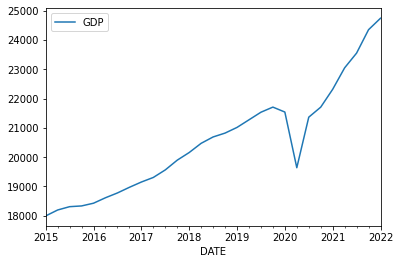

In [71]:
gdp.plot()